In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

import joblib

In [2]:
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AJIBOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Preprocessing


In [3]:
#loading the dataset to a pandas dataFrame
news_dataset = pd.read_csv('covidSelfDataset.csv', index_col='ID')

In [4]:
news_dataset.shape

(16989, 3)

In [5]:
#print the first five rows of the dataframe
news_dataset.head()

,text,outcome,label
ID,,,
1,A post claims compulsory vacination violates t...,fake,1
2,A photo claims that this person is a doctor wh...,fake,1
3,Post about a video claims that it is a protest...,fake,1
4,All deaths by respiratory failure and pneumoni...,fake,1
5,The dean of the College of Biologists of Euska...,fake,1


In [6]:
news_dataset.isnull().sum()

text       0
outcome    0
label      0
dtype: int64

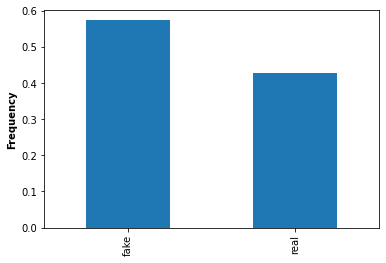

In [7]:
news_dataset['outcome'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Frequency', fontweight = 'bold')
plt.savefig('label.jpeg', dpi=1200);

In [8]:
print('The outcome and label columns have been incorrectly encoded for {:.0f} observations'.format(((news_dataset['outcome'] == 'fake') != (news_dataset['label'] == 1)).sum()))

The outcome and label columns have been incorrectly encoded for 0 observations


## Stemming

In [9]:
port_stem = PorterStemmer()

In [10]:
def stemming(text):
    stemmed_content = re.sub('[^a-zA-z]', ' ', text)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [11]:
news_dataset['text'] = news_dataset['text'].apply(stemming)

In [12]:
print(news_dataset['text'].iloc[:5])

ID
1    post claim compulsori vacin violat principl bi...
2    photo claim person doctor die attend mani covi...
3    post video claim protest confin town aranda de...
4    death respiratori failur pneumonia regist covi...
5    dean colleg biologist euskadi state lot pcr fa...
Name: text, dtype: object


In [13]:
#separating the data and label
X = news_dataset['text'].values
Y = news_dataset['label'].values

## Converting the textual data into numerical data 

In [14]:
# converting the textual data into numerical data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [15]:
joblib.dump(vectorizer.vocabulary_, 'vocabulary.sav')

['vocabulary.sav']

In [16]:
print(X[0])

  (0, 2144)	0.06892818833123912
  (0, 7502)	0.21520798800514016
  (0, 9568)	0.15395882309035808
  (0, 4413)	0.27645351270984164
  (0, 6946)	0.16885382146009836
  (0, 3181)	0.20992059069902125
  (0, 5432)	0.21703889834087758
  (0, 7624)	0.21977478276878892
  (0, 9033)	0.1427743243439029
  (0, 6665)	0.26296982768263505
  (0, 3094)	0.24241939654905476
  (0, 2072)	0.07980210937826869
  (0, 993)	0.3512753569950622
  (0, 7056)	0.32704126961251745
  (0, 9695)	0.2193705886984106
  (0, 9569)	0.3512753569950622
  (0, 1938)	0.28863114987198435
  (0, 1773)	0.13044370171956524
  (0, 6949)	0.154772666765999


## Splitting the dataset to training and test data


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

## GridSearch CV

# Model Selection, Training and Building

In [18]:
models = {
    'Logistic Regression':LogisticRegression(random_state=42, C=1.8, multi_class='multinomial', max_iter=100),
    'Decision Tree':DecisionTreeClassifier(random_state=42, max_depth=200),
    'Random Forest':RandomForestClassifier(n_estimators = 50, random_state=42, max_depth=250),
    'Support Vector':SVC(C=1.7, gamma='scale', random_state=42),
    'K-Nearest Neighbour': KNeighborsClassifier(n_neighbors=14, weights='distance')
}

In [19]:
cv3_scores = []
cv5_scores = []
cv10_scores = []
acc = []

In [20]:
for model in models.values():
    scores_3 = cross_val_score(model, X_train, Y_train, cv=3, n_jobs=-1, verbose=1)
    cv3_scores.append(round(scores_3.mean()*100, 2))

    scores_5 = cross_val_score(model, X_train, Y_train, cv=5, n_jobs=-1, verbose=1)
    cv5_scores.append(round(scores_5.mean()*100, 2))

    scores_10 = cross_val_score(model, X_train, Y_train, cv=10, n_jobs=-1, verbose=1)
    cv10_scores.append(round(scores_10.mean()*100, 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1452
           1       0.95      0.96      0.95      1946

    accuracy                           0.95      3398
   macro avg       0.95      0.94      0.94      3398
weighted avg       0.95      0.95      0.95      3398

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1452
           1       0.90      0.88      0.89      1946

    accuracy                           0.87      3398
   macro avg       0.87      0.87      0.87      3398
weighted avg       0.88      0.87      0.87      3398

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1452
           1       0.93      0.95      0.94      1946

    accuracy                           0.93      3398
   macro avg       0.93      0.92      0.93      3398
weighted avg       0.93      0.93      0.93      3398

              preci

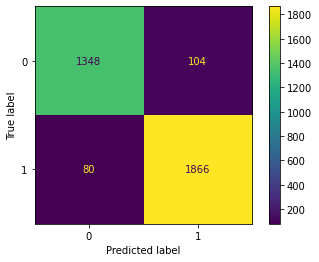

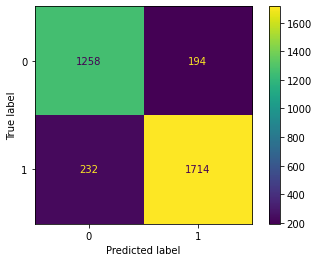

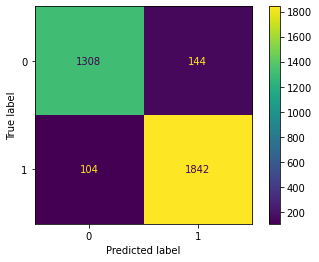

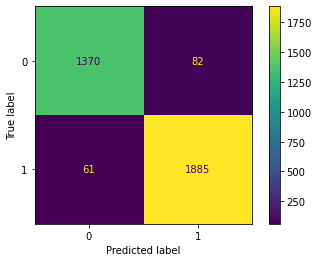

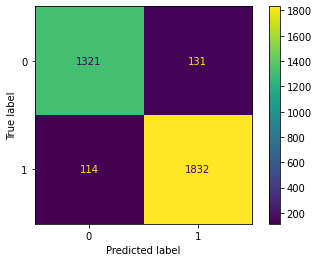

In [21]:
for model in models.values():
    model = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc.append(round(accuracy_score(y_pred, Y_test)*100, 2))
    
    classification_rep = classification_report(Y_test, y_pred)
    print(classification_rep)
    
    conf_mat= confusion_matrix(Y_test, y_pred, labels=model.classes_)
    disp_lrm = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model.classes_)
    disp_lrm.plot()
    #plt.savefig('{}.png'.format(models.keys()));

In [22]:
cv_result = pd.DataFrame({'Test Accuracy':acc, '3-fold CV Accuracy':cv3_scores, '5-fold CV Accuracy':cv5_scores, '10-fold CV Accuracy':cv10_scores,},
                         index=models.keys())
cv_result

,Test Accuracy,3-fold CV Accuracy,5-fold CV Accuracy,10-fold CV Accuracy
Logistic Regression,94.59,93.39,93.95,94.22
Decision Tree,87.46,85.92,87.07,88.06
Random Forest,92.70,91.46,92.11,92.46
Support Vector,95.79,94.33,95.00,95.41
K-Nearest Neighbour,92.79,91.63,92.46,92.75


In [23]:
cv_result.to_csv("FND Metrics Table.csv")

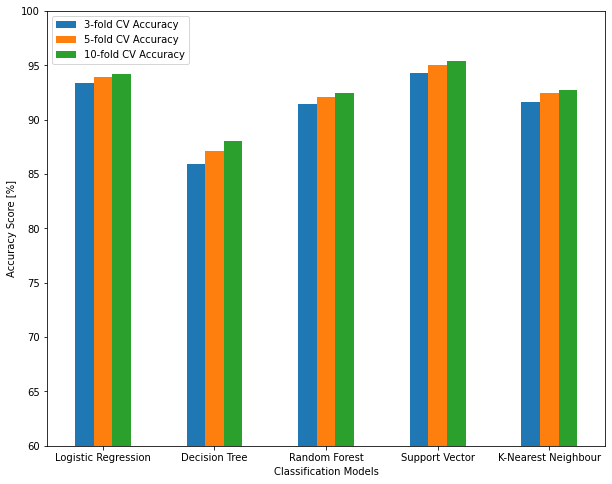

In [24]:
cv_result[['3-fold CV Accuracy','5-fold CV Accuracy','10-fold CV Accuracy']].plot(kind='bar',figsize=(10, 8))
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score [%]')
plt.ylim([60, 100])
plt.xticks(rotation=0)
plt.legend();
plt.savefig('cv_score.jpg',  dpi=1200)

### Saving Model

In [25]:
joblib.dump(models["Support Vector"], "FND.sav")

['FND.sav']